In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                            summarize, 
                            poly)

In [8]:
csv_path = "~/Documents/stat_learning/csv_files"
file_path_auto = os.path.join(csv_path, "Auto.csv")

Auto = pd.read_csv(file_path_auto, na_values=["?"])
Auto = Auto.dropna()

In [13]:
design = MS(["horsepower"])
X = design.fit_transform(Auto)
y = Auto.mpg
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


i. There is a relationship between horsepower and mpg.  
ii. The relationship between horsepower and mpg is quite strong because the p-value of the horsepower coefficient is near-zero.  
iii. Negative.  

In [22]:
new_df = pd.DataFrame({"horsepower": [98]})
newX = design.transform(new_df)
predictions = results.get_prediction(newX)
print("95%% confidence interval: %s\n95%% prediction interval: %s"
     %(str(predictions.conf_int(alpha = .05)[0]), str(predictions.conf_int(obs = True, alpha = .05)[0])))

95% confidence interval: [23.97307896 24.96107534]
95% prediction interval: [14.80939607 34.12475823]


iv. 95% confidence interval: [23.97307896 24.96107534], 95% prediction interval: [14.80939607 34.12475823]

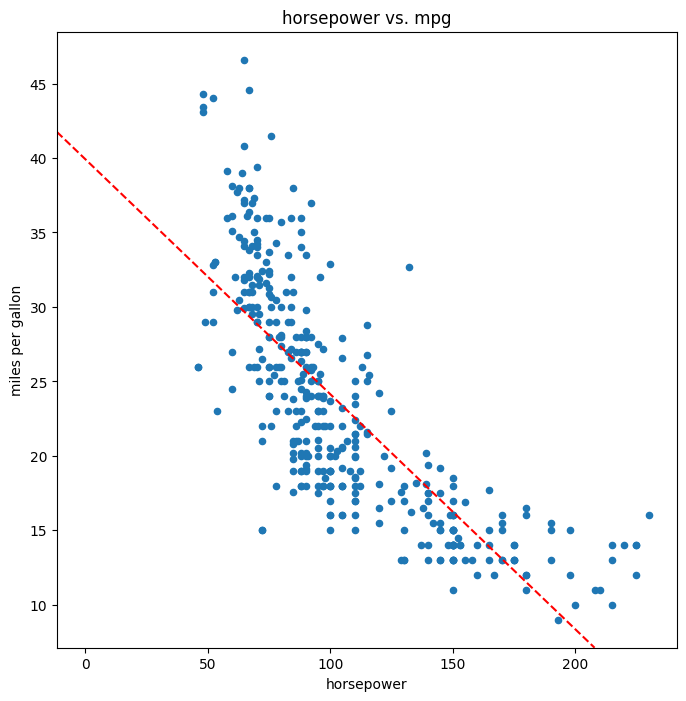

In [34]:
ax = subplots(figsize = (8, 8))[1]
Auto.plot.scatter("horsepower", "mpg", ax = ax)
ax.set_xlabel("horsepower")
ax.set_ylabel("miles per gallon")
ax.set_title("horsepower vs. mpg")
intercept = results.params["intercept"]
slope = results.params["horsepower"]
ax.axline((0, intercept), slope = slope, color = "red", linestyle = "--")

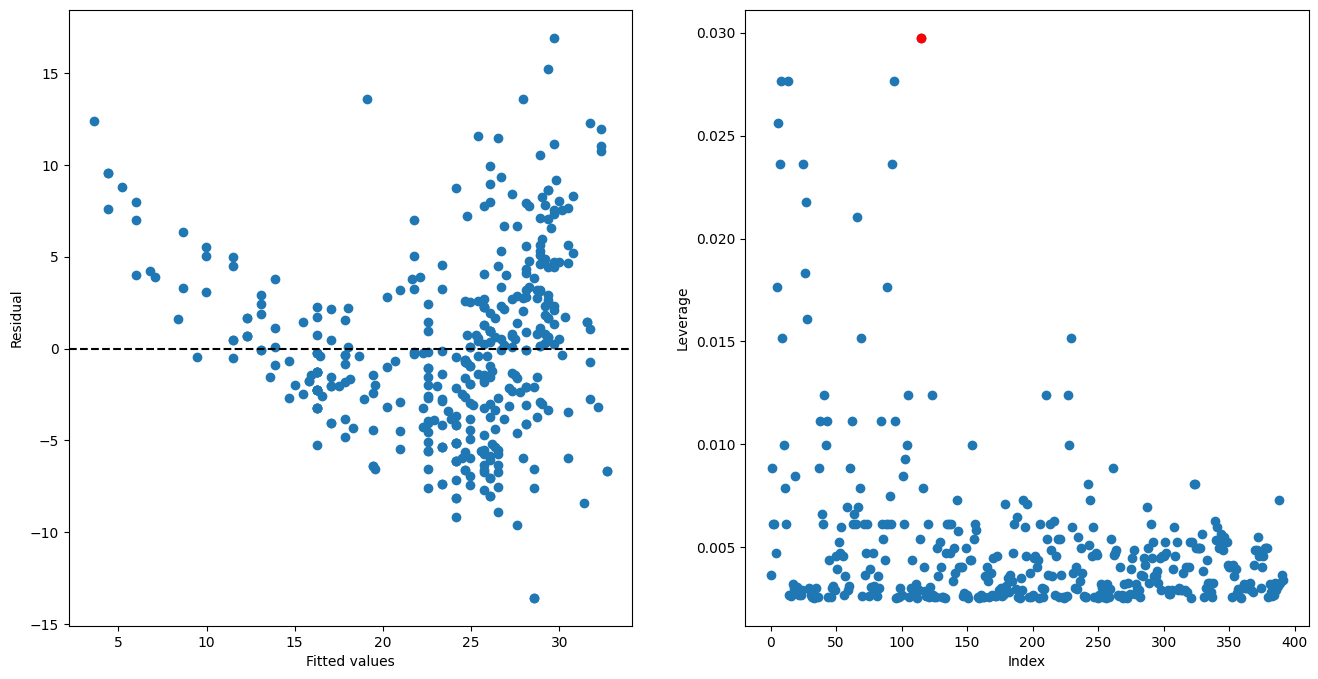

In [43]:
# diagnostic plots
axes = subplots(1, 2, figsize = (16, 8))[1]
ax_resid_fitted = axes[0]
ax_resid_leverage = axes[1]

ax_resid_fitted.scatter(results.fittedvalues, results.resid)
ax_resid_fitted.set_xlabel("Fitted values")
ax_resid_fitted.set_ylabel("Residual")
ax_resid_fitted.axhline(0, c = "k", ls = "--")

infl = results.get_influence()
indices = np.arange(X.shape[0]) # array range from 0 to length of X, i.e. indices of observations
leverages = infl.hat_matrix_diag
ax_resid_leverage.scatter(indices, leverages)
ax_resid_leverage.set_xlabel("Index")
ax_resid_leverage.set_ylabel("Leverage")
max_index = np.argmax(infl.hat_matrix_diag)
ax_resid_leverage.scatter(indices[max_index], leverages[max_index], color = "red", label = "%i" %max_index)

The residual vs. fitted values graph suggests that the relationship between horsepower and mpg may be non-linear.  
The leverage graph suggests that there may be high-leverage observations.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

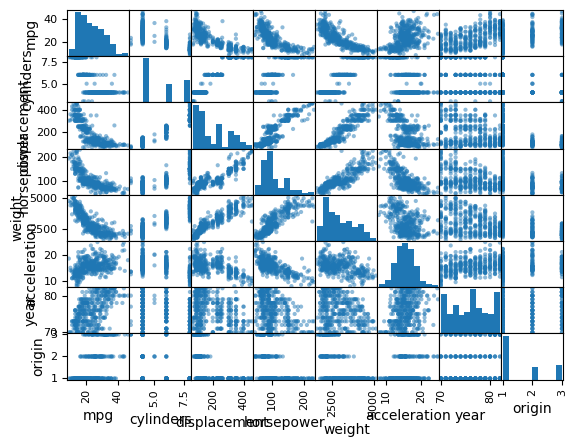

In [44]:
pd.plotting.scatter_matrix(Auto)

In [45]:
Auto.corr()

/tmp/ipykernel_145179/340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [72]:
names = Auto.columns.drop(["name", "mpg"])
design = MS(names)
X = design.fit_transform(Auto)
y = Auto["mpg"]
model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [77]:
# the anova_lm function needs the formula
# The build_sequence() method is specifically for the ModelSpec class.
anova_table = anova_lm(*[sm.OLS(y, D).fit() for D in design.build_sequence(Auto, anova_type='sequential')])
anova_table.index = design.names
anova_table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
intercept,391.0,23818.993469,0.0,NaN,NaN,NaN
cylinders,390.0,9415.910391,1.0,14403.083079,1300.683788,2.806569e-126
displacement,389.0,8342.566366,1.0,1073.344025,96.929329,1.442524e-20
horsepower,388.0,7939.158297,1.0,403.408069,36.430140,3.700154e-09
weight,387.0,6963.433344,1.0,975.724953,88.113748,5.378297e-19
acceleration,386.0,6962.467273,1.0,0.966071,0.087242,7.678720e-01
year,385.0,4543.347025,1.0,2419.120249,218.460900,1.794078e-39
origin,384.0,4252.212530,1.0,291.134494,26.291171,4.665681e-07


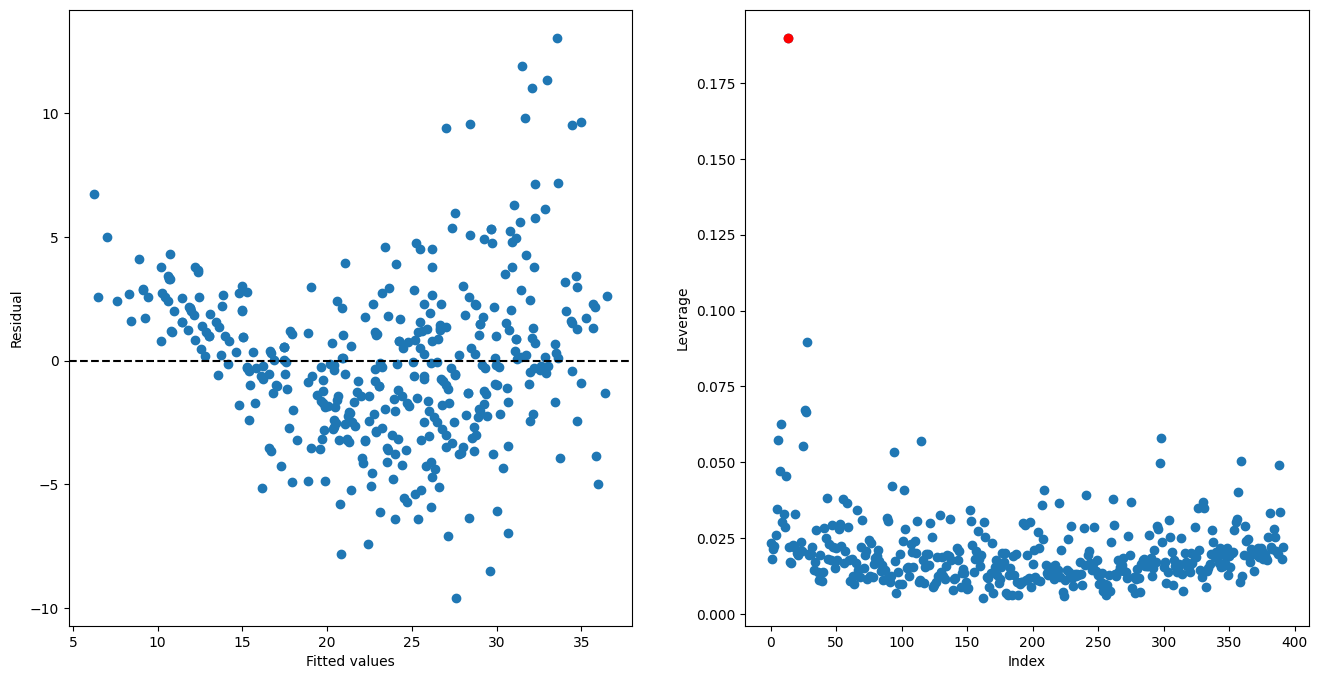

In [79]:
# diagnostic plots
def plot_diagnostics(results): 
    # diagnostic plots
    axes = subplots(1, 2, figsize = (16, 8))[1]
    ax_resid_fitted = axes[0]
    ax_resid_leverage = axes[1]
    
    ax_resid_fitted.scatter(results.fittedvalues, results.resid)
    ax_resid_fitted.set_xlabel("Fitted values")
    ax_resid_fitted.set_ylabel("Residual")
    ax_resid_fitted.axhline(0, c = "k", ls = "--")
    
    infl = results.get_influence()
    indices = np.arange(X.shape[0]) # array range from 0 to length of X, i.e. indices of observations
    leverages = infl.hat_matrix_diag
    ax_resid_leverage.scatter(indices, leverages)
    ax_resid_leverage.set_xlabel("Index")
    ax_resid_leverage.set_ylabel("Leverage")
    max_index = np.argmax(infl.hat_matrix_diag)
    ax_resid_leverage.scatter(indices[max_index], leverages[max_index], color = "red", label = "%i" %max_index)

plot_diagnostics(results2)

In [96]:
name_list = list(names)
name_list.append(("year", "acceleration"))
design = MS(name_list)
X = design.fit_transform(Auto)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,97.6200,20.829,4.687,0.000
cylinders,-0.2164,0.315,-0.687,0.492
displacement,0.0088,0.007,1.171,0.242
horsepower,-0.0269,0.013,-2.012,0.045
weight,-0.0059,0.001,-9.232,0.000
acceleration,-7.1818,1.290,-5.567,0.000
year,-0.7462,0.270,-2.767,0.006
origin,1.2630,0.269,4.693,0.000
year:acceleration,0.0946,0.017,5.645,0.000


In [101]:
X = MS(["horsepower"]).fit_transform(Auto)
X = np.sqrt(X)
model4 = sm.OLS(y, X)
summarize(model4.fit())

,coef,std err,t,P>|t|
intercept,58.7052,1.349,43.516,0.0
horsepower,-3.5035,0.132,-26.544,0.0
